In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Bytedance\AppData\Local\Temp\ipykernel_23592\2563838555.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
# get data
df= pd.read_csv(r"C:\Users\Bytedance\Desktop\dataaaaaaaa\job_placement.csv")
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [8]:
#  data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [12]:
#drop null value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   699 non-null    int64  
 1   name                 699 non-null    object 
 2   gender               699 non-null    object 
 3   age                  699 non-null    int64  
 4   degree               699 non-null    object 
 5   stream               699 non-null    object 
 6   college_name         699 non-null    object 
 7   placement_status     699 non-null    object 
 8   salary               699 non-null    int64  
 9   gpa                  699 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 65.5+ KB


In [13]:
df.isnull().sum()

id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

In [18]:
# analyse
# To find the totak count of placed and not placed of student
placed_count= df["placement_status"].value_counts()
placed_count

placement_status
Placed        569
Not Placed    130
Name: count, dtype: int64

In [22]:
 placed_status=df[["placement_status"]].value_counts(normalize=True)*100
placed_status

placement_status
Placed              81.402003
Not Placed          18.597997
Name: proportion, dtype: float64

<Axes: xlabel='placement_status', ylabel='count'>

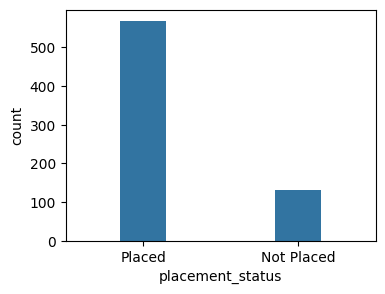

In [30]:
plt.figure(figsize=(4,3))
sns.countplot(x="placement_status",data=df,width=0.3)

<Axes: xlabel='placement_status'>

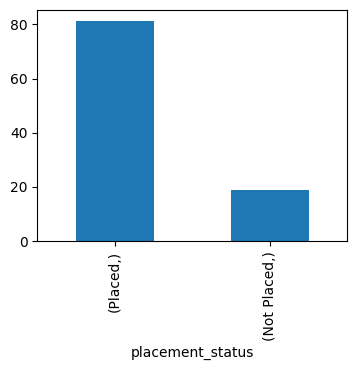

In [33]:
plt.figure(figsize=(4,3))
placed_status.plot(kind="bar")

In [34]:
df.groupby(["stream"])["placement_status"].value_counts()

stream                         placement_status
Computer Science               Placed              161
                               Not Placed           53
Electrical Engineering         Placed               90
                               Not Placed           22
Electronics and Communication  Placed              101
                               Not Placed           10
Information Technology         Placed              128
                               Not Placed           24
Mechanical Engineering         Placed               89
                               Not Placed           21
Name: count, dtype: int64

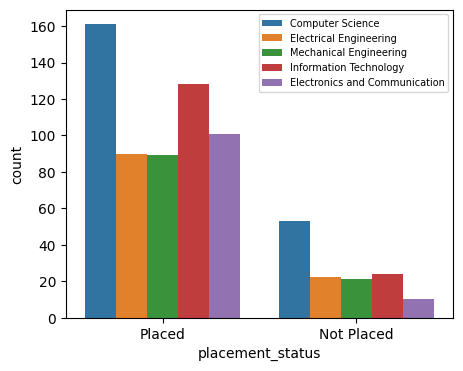

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x="placement_status",data=df,hue="stream")
plt.legend(fontsize=7)

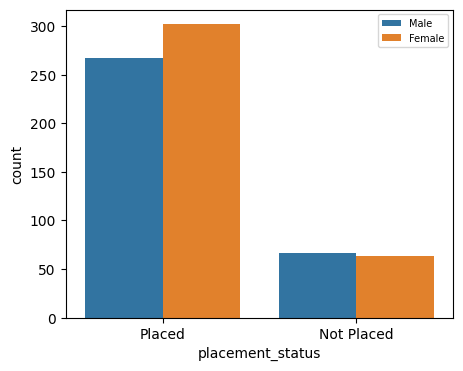

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x="placement_status",data=df,hue="gender")
plt.legend(fontsize=7)

In [42]:
avg_salary=df[df.placement_status=="Placed"].groupby("gender")[["salary"]].mean()
avg_salary

,salary
gender,
Female,64519.867550
Male,64370.786517


<Axes: xlabel='gender', ylabel='salary'>

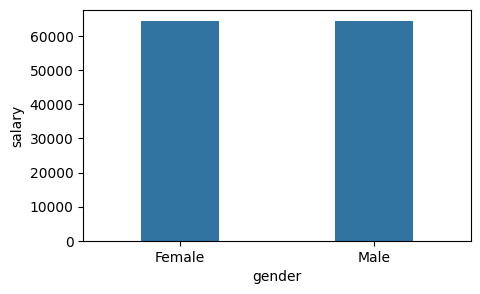

In [43]:
plt.figure(figsize=(5,3))
sns.barplot(x=avg_salary.index,y="salary",data=avg_salary,width=0.4)

In [48]:
avg_age=df.groupby("placement_status")[["age"]].mean()
avg_age

,age
placement_status,
Not Placed,24.353846
Placed,24.425308


<Axes: xlabel='placement_status', ylabel='age'>

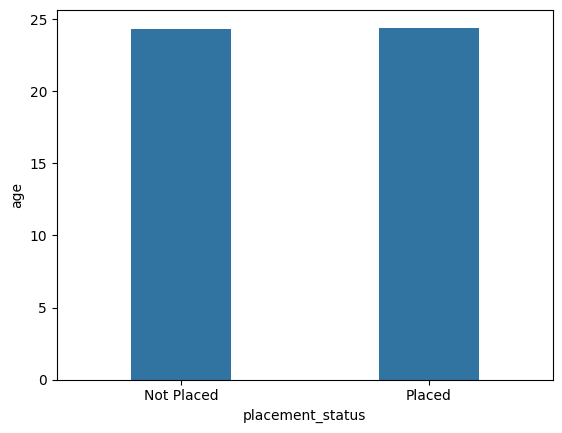

In [50]:
sns.barplot(x=avg_age.index,y="age",data=avg_age,width=0.4)

In [51]:
avg_gpa=df.groupby("placement_status")[["gpa"]].mean()
avg_gpa

,gpa
placement_status,
Not Placed,3.702308
Placed,3.761511


<BarContainer object of 2 artists>

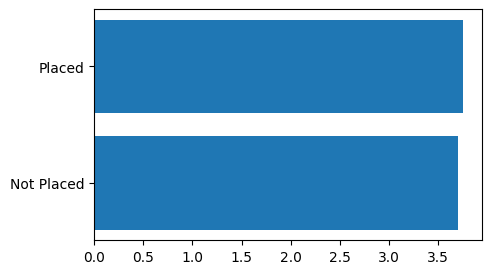

In [58]:
plt.figure(figsize=(5,3))
plt.barh(avg_gpa.index,avg_gpa["gpa"])

In [59]:
df2=df[df.placement_status=="Placed"].groupby("college_name")["placement_status"].value_counts().sort_values(ascending=False)[:5]
df2

college_name                              placement_status
University of Colorado--Boulder           Placed              43
University of Michigan--Ann Arbor         Placed              43
University of California--Berkeley        Placed              43
University of Illinois--Urbana-Champaign  Placed              43
University of Virginia                    Placed              42
Name: count, dtype: int64

<Axes: xlabel='college_name,placement_status'>

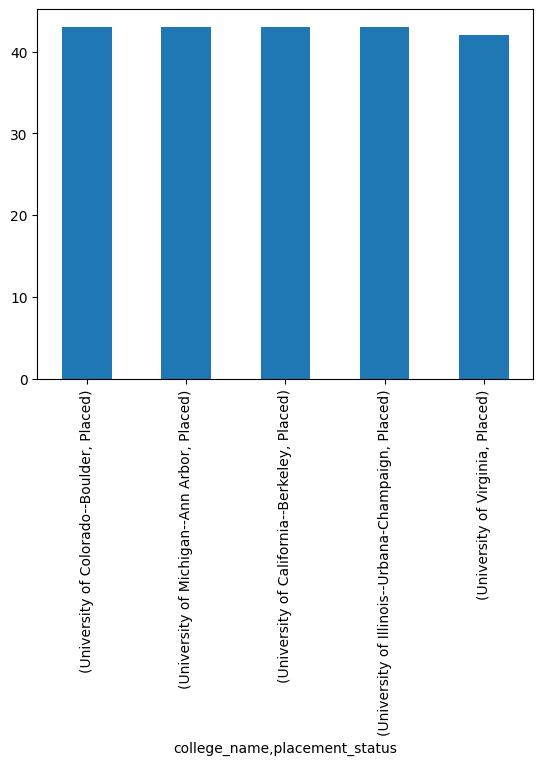

In [60]:
df2.plot(kind="bar")

In [61]:
df3=df[df.placement_status=="Placed"]
df3["stream"].value_counts(normalize=True)*100

stream
Computer Science                 28.295255
Information Technology           22.495606
Electronics and Communication    17.750439
Electrical Engineering           15.817223
Mechanical Engineering           15.641476
Name: proportion, dtype: float64

In [68]:
df3=df[df.placement_status=="Not Placed"]
df3

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
7,8,Emma Garcia,Female,24,Bachelor's,Computer Science,University of Chicago,Not Placed,0,3.6,2.0
11,12,Ava Lopez,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0
15,16,Isabella Perez,Female,25,Bachelor's,Mechanical Engineering,University of Virginia,Not Placed,0,3.7,2.0
21,22,Elizabeth Wood,Female,26,Bachelor's,Mechanical Engineering,University of Texas--Austin,Not Placed,0,3.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...
678,679,Liam Perez,Male,25,Bachelor's,Computer Science,University of Pennsylvania,Not Placed,0,3.7,2.0
683,684,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0
688,689,Oliver Rodriguez,Male,23,Bachelor's,Computer Science,University of California--Riverside,Not Placed,0,3.9,2.0
694,695,Sophia Johnson,Female,24,Bachelor's,Mechanical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0


In [69]:
df3["stream"].value_counts()

stream
Computer Science                 53
Information Technology           24
Electrical Engineering           22
Mechanical Engineering           21
Electronics and Communication    10
Name: count, dtype: int64

In [70]:
df3["stream"].value_counts(normalize=True)*100

stream
Computer Science                 40.769231
Information Technology           18.461538
Electrical Engineering           16.923077
Mechanical Engineering           16.153846
Electronics and Communication     7.692308
Name: proportion, dtype: float64

In [71]:
# importing mysql table in python to create dataframe

In [73]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import mysql.connector as connection
import pandas as pd

mydb = connection.connect(host="localhost", database = '12pm',user="root", passwd="1234",use_pure=True)
query = "Select * from carss;"
df = pd.read_sql(query,mydb)
mydb.close() #close the connection

In [75]:
df

,ï»¿cname,REGION,SALES
0,KIA,EAST,2000
1,TOYOTA,WEST,1157
2,TATA,NORTH,1112
3,BMW,SOUTH,1070
4,MERCEDES,WEST,1048
5,AUDI,EAST,2069
6,TOYOTA,SOUTH,1914
7,TATA,SOUTH,1848
8,BMW,SOUTH,2396
9,MERCEDES,NORTH,2881
